In [110]:
import pandas as pd
import numpy as np
import pylab as plt
import seaborn as sns

import warnings
warnings.filterwarnings('ignore') 

pd.set_option('display.max_columns', None)   
pd.set_option('display.max_rows', None)  

plt.rcParams['figure.figsize']=(20, 12)



In [111]:
df=pd.read_csv('../data/all_lista.csv')

In [112]:
df.event.fillna('0', inplace=True)

In [113]:
df.columns

Index(['fecha', 'uri', 'artist_names', 'track_name', 'source', 'position',
       'previous_rank', 'dif', 'peak_rank', 'days_on_chart', 'streams',
       'estilo', 'temp_max', 'temp_min', 'temp_media', 'precipitacion',
       'dates', 'event', 'type', 'region', 'fin_de_semana'],
      dtype='object')

In [114]:
##Transformaciones de columnas para analisis
df.temp_max=df.temp_max.apply(lambda x: str(x).replace(',','.'))
df.temp_min=df.temp_min.apply(lambda x: str(x).replace(',','.'))
df.temp_media=df.temp_media.apply(lambda x: str(x).replace(',','.'))
df.precipitacion=df.precipitacion.apply(lambda x: str(x).replace(',','.'))


df['temp_max'] = df['temp_max'].astype(float, errors = 'raise')
df['temp_min'] = df['temp_min'].astype(float, errors = 'raise')
df['temp_media'] = df['temp_media'].astype(float, errors = 'raise')
df['precipitacion'] = df['precipitacion'].astype(float, errors = 'raise')

df.event=df.event.apply(lambda x: 0 if  (x=='0') else 1)

df['event'] = df['event'].astype(float, errors = 'raise')




df.event.unique()






array([0., 1.])

In [115]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
position,432335.0,1.003994e+02,57.743108,1.00,50.00,100.00,150.00,200.00
previous_rank,432335.0,9.202460e+01,58.604591,-1.00,41.00,91.00,142.00,200.00
dif,432335.0,2.949849e+00,18.922330,-190.00,-3.00,0.00,5.00,199.00
peak_rank,432335.0,3.757805e+01,42.917970,1.00,5.00,20.00,56.00,200.00
days_on_chart,432335.0,1.910827e+02,257.290781,1.00,35.00,102.00,237.00,2131.00
streams,432335.0,1.249930e+06,882321.298997,325951.00,750238.50,954812.00,1422720.50,19749704.00
temp_max,401020.0,2.073872e+01,6.798407,5.42,14.75,20.24,26.71,35.87
temp_min,401020.0,1.006415e+01,4.714987,3.09,5.67,9.23,14.29,20.02
temp_media,401020.0,1.566735e+01,5.913932,1.99,10.62,15.08,20.80,28.40
precipitacion,401020.0,1.623546e+00,2.320717,0.00,0.13,0.63,2.29,19.91


In [116]:
stats=df.describe().T

stats['IQR']=stats['75%']-stats['25%']

stats.tail()



,count,mean,std,min,25%,50%,75%,max,IQR
temp_min,401020.0,10.064154,4.714987,3.09,5.67,9.23,14.29,20.02,8.62
temp_media,401020.0,15.667346,5.913932,1.99,10.62,15.08,20.80,28.40,10.18
precipitacion,401020.0,1.623546,2.320717,0.00,0.13,0.63,2.29,19.91,2.16
event,432335.0,0.194694,0.395965,0.00,0.00,0.00,0.00,1.00,0.00
fin_de_semana,432335.0,3.998739,2.000302,1.00,2.00,4.00,6.00,7.00,4.00


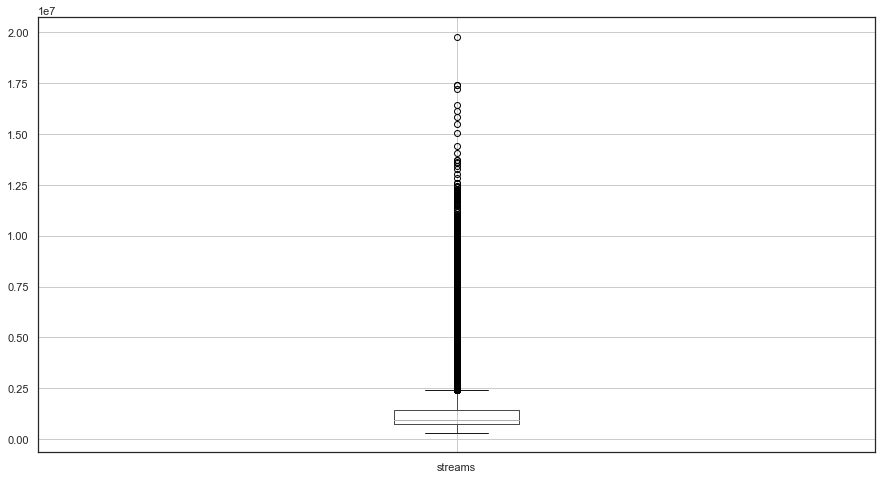

In [117]:
df[['streams']].boxplot(figsize=(15, 8));

In [118]:
outliers=pd.DataFrame(columns=stats.index)

for c in stats.index:
    
    iqr=stats.at[c, 'IQR']
    
    cutoff=1.5 * iqr   # test de tukey
    
    lower=stats.at[c, '25%'] - cutoff
    upper=stats.at[c, '75%'] + cutoff
    
    res=df[(df[c] < lower) | (df[c] > upper)].copy()
    
    res['outliers']=c
    
    outliers=outliers.append(res, sort=True)
    
outliers['outliers'].value_counts()

clean_index=[i for i in df.index if i not in outliers.index]

len(clean_index)



224976

In [119]:
df1=df.copy()
df1=df1.iloc[clean_index]
len(outliers.index.unique())

207359

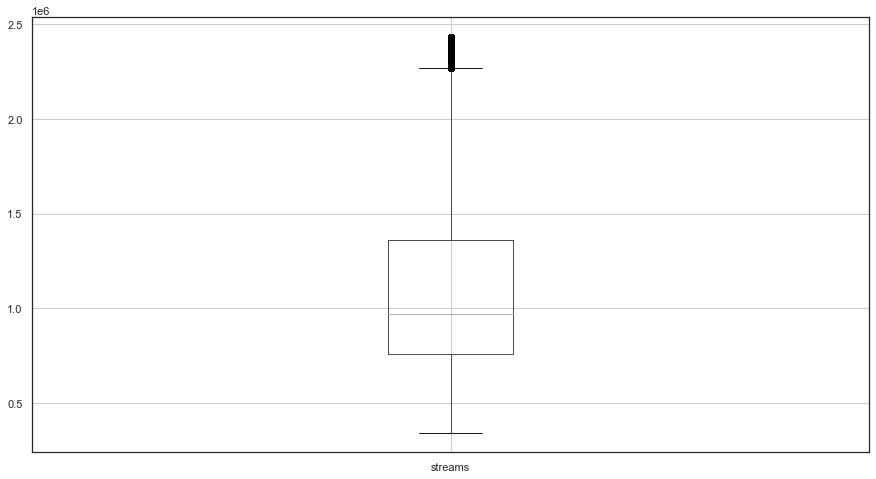

In [120]:
df1[['streams']].boxplot(figsize=(15, 8));

In [121]:
corr=df1.corr()

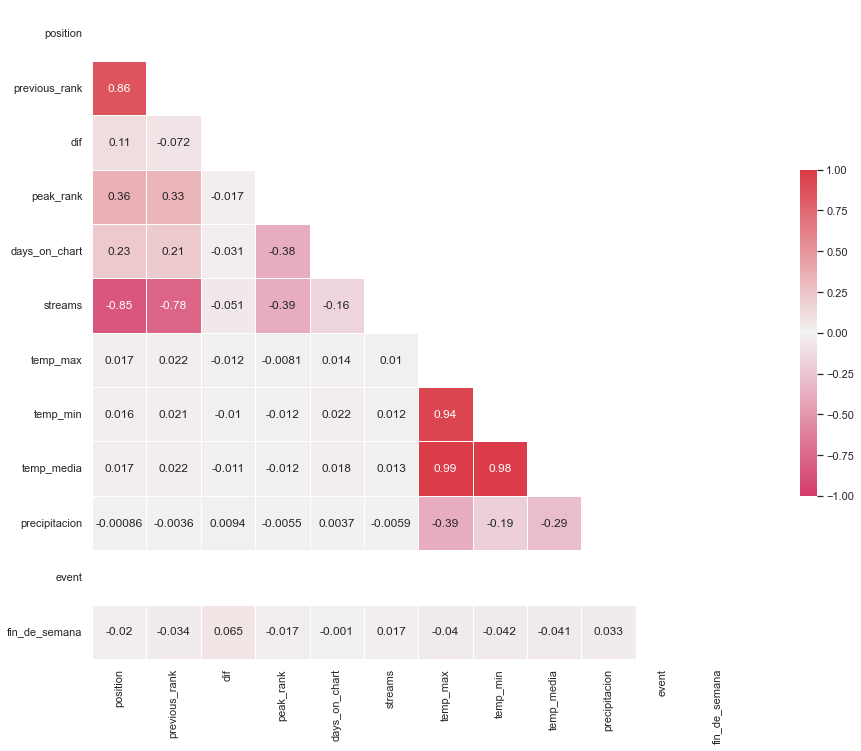

In [122]:
sns.set(style='white')    # estilo blanco

mascara=np.triu(np.ones_like(corr, dtype=bool))   # genera una mascara

cmap=sns.diverging_palette(0, 10, as_cmap=True)   # paleta de colores


sns.heatmap(corr,
            mask=mascara,
            cmap=cmap,
            vmax=1,
            vmin=-1,
            center=0,
            square=True,
            linewidth=0.5,
            cbar_kws={'shrink': 0.5},
            annot=True
           );

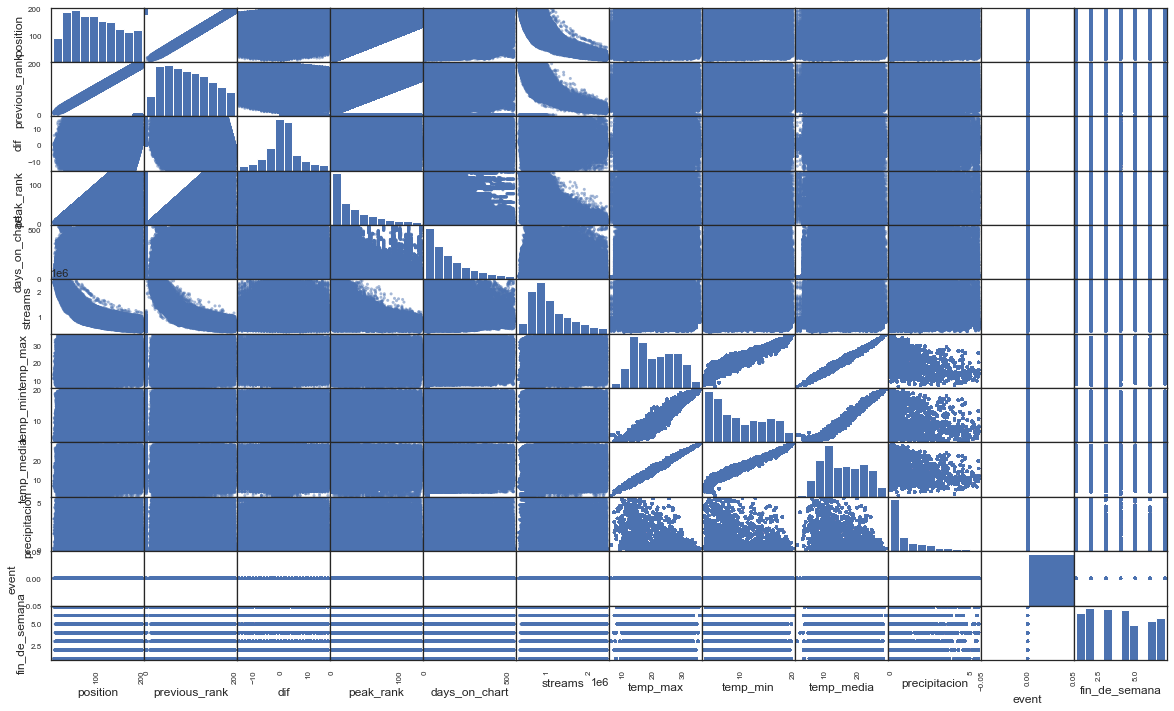

In [123]:
pd.plotting.scatter_matrix(df1);